# Complex Spacing Ratio

In [1]:
import sys
sys.path.insert(0, '../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle

from qiskit.quantum_info import DensityMatrix, random_unitary
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm
from math import ceil

from loss_functions import *
from optimization import *
from quantum_channel import *
from kraus_channels import *
from quantum_tools import *
from experimental import *
from spam import *
from scipy.stats import gaussian_kde
from quantum_circuits import *
from analysis import *
from utils import *

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=4)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
def complex_spacing_ratio(spectrum):
    d = len(spectrum)
    spectrum = np.array(spectrum)[:,0]
    z_list = []
    for i in tqdm(range(d)):
        idx_NN = i
        dist_NN = float("inf")

        idx_NNN = i
        dist_NNN = float("inf")

        for j in range(d):
            if j != i:
                dist = np.abs(spectrum[i] - spectrum[j])
                if dist < dist_NN:
                    dist_NNN = dist_NN
                    idx_NNN = idx_NN

                    dist_NN = dist
                    idx_NN = j
                    
                if (dist > dist_NN) and (dist < dist_NNN):
                    dist_NNN = dist
                    idx_NNN = j

        z = (spectrum[idx_NN] -spectrum[i]) / (spectrum[idx_NNN] - spectrum[i])
        z_list.append(z)

    return np.array(z_list)


def spacing_ratio(spectrum):
    d = len(spectrum)
    z_list = []
    for i in tqdm(range(d)):
        idx_NN = i
        dist_NN = float("inf")

        idx_NNN = i
        dist_NNN = float("inf")

        for j in range(d):
            if j != i:
                dist = np.angle(spectrum[i] - spectrum[j])
                if dist < dist_NN:
                    dist_NNN = dist_NN
                    idx_NNN = idx_NN

                    dist_NN = dist
                    idx_NN = j
                    
                if (dist > dist_NN) and (dist < dist_NNN):
                    dist_NNN = dist
                    idx_NNN = j

        z = np.angle(spectrum[i] - spectrum[idx_NN]) / np.angle(spectrum[i] - spectrum[idx_NNN])
        z_list.append(z)
        
    return np.array(z_list)

In [52]:
n = 4
d = 2**n

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

channel_target = KrausMap(d, rank=d)
spectrum = channel_spectrum(channel_target, use_coords=False)
z_list = complex_spacing_ratio(spectrum)

  0%|          | 0/256 [00:00<?, ?it/s]

(array([[0., 1., 2., 7., 3., 4., 8., 1., 0., 0.],
        [0., 7., 3., 5., 3., 4., 4., 4., 7., 0.],
        [4., 2., 8., 3., 4., 5., 3., 7., 4., 3.],
        [2., 3., 1., 3., 1., 1., 3., 1., 3., 3.],
        [4., 3., 1., 2., 4., 2., 1., 2., 3., 4.],
        [6., 6., 3., 1., 0., 0., 0., 3., 6., 6.],
        [7., 4., 1., 0., 2., 2., 0., 3., 2., 7.],
        [1., 6., 5., 1., 3., 3., 1., 5., 7., 0.],
        [0., 1., 3., 0., 0., 0., 0., 3., 1., 0.],
        [0., 0., 0., 1., 0., 1., 2., 0., 0., 0.]]),
 array([-0.9645, -0.7685, -0.5725, -0.3766, -0.1806,  0.0154,  0.2113,
         0.4073,  0.6033,  0.7993,  0.9952]),
 array([-0.9775, -0.7799, -0.5822, -0.3846, -0.1869,  0.0107,  0.2083,
         0.406 ,  0.6036,  0.8012,  0.9989]),
 <matplotlib.collections.QuadMesh at 0x23a3756a230>)

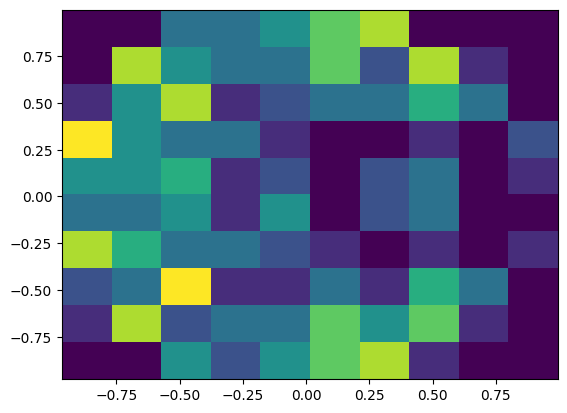

In [53]:
plt.hist2d(np.real(z_list), np.imag(z_list))

  0%|          | 0/256 [00:00<?, ?it/s]

(array([[ 0.,  0.,  0.,  0.,  1., 19.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0., 12.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0., 26.,  0.,  0.,  0.,  0.],
        [ 1.,  0.,  0.,  0.,  0., 19.,  0.,  0.,  0.,  0.],
        [ 2.,  0.,  0.,  0.,  0., 34.,  0.,  0.,  0.,  1.],
        [ 1.,  1.,  0.,  0.,  0., 36.,  1.,  0.,  1.,  1.],
        [ 1.,  0.,  1.,  0.,  0., 22.,  0.,  1.,  0.,  1.],
        [ 0.,  0.,  0.,  0.,  0., 20.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0., 20.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0., 33.,  0.,  0.,  0.,  0.]]),
 array([-0.9869, -0.7892, -0.5914, -0.3937, -0.196 ,  0.0017,  0.1995,
         0.3972,  0.5949,  0.7926,  0.9903]),
 array([-0.9979, -0.8044, -0.611 , -0.4175, -0.2241, -0.0306,  0.1628,
         0.3563,  0.5498,  0.7432,  0.9367]),
 <matplotlib.collections.QuadMesh at 0x24bfe0fe020>)

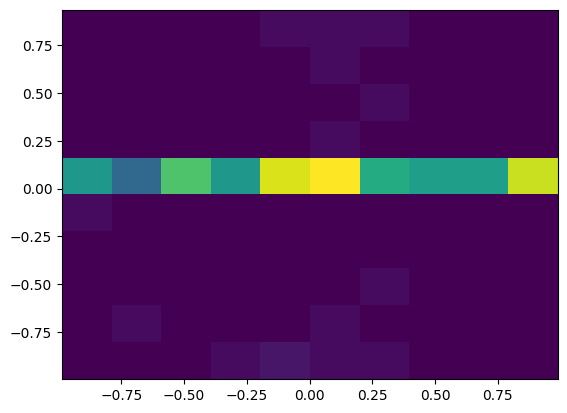

In [3]:
n = 4
d = 2**n

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

channel_target = DilutedKrausMap(U = generate_unitary(d), c=0.999, kraus_part=KrausMap(d, rank=d))
spectrum = channel_spectrum(channel_target, use_coords=False)
z_list = complex_spacing_ratio(spectrum)

plt.hist2d(np.real(z_list), np.imag(z_list))

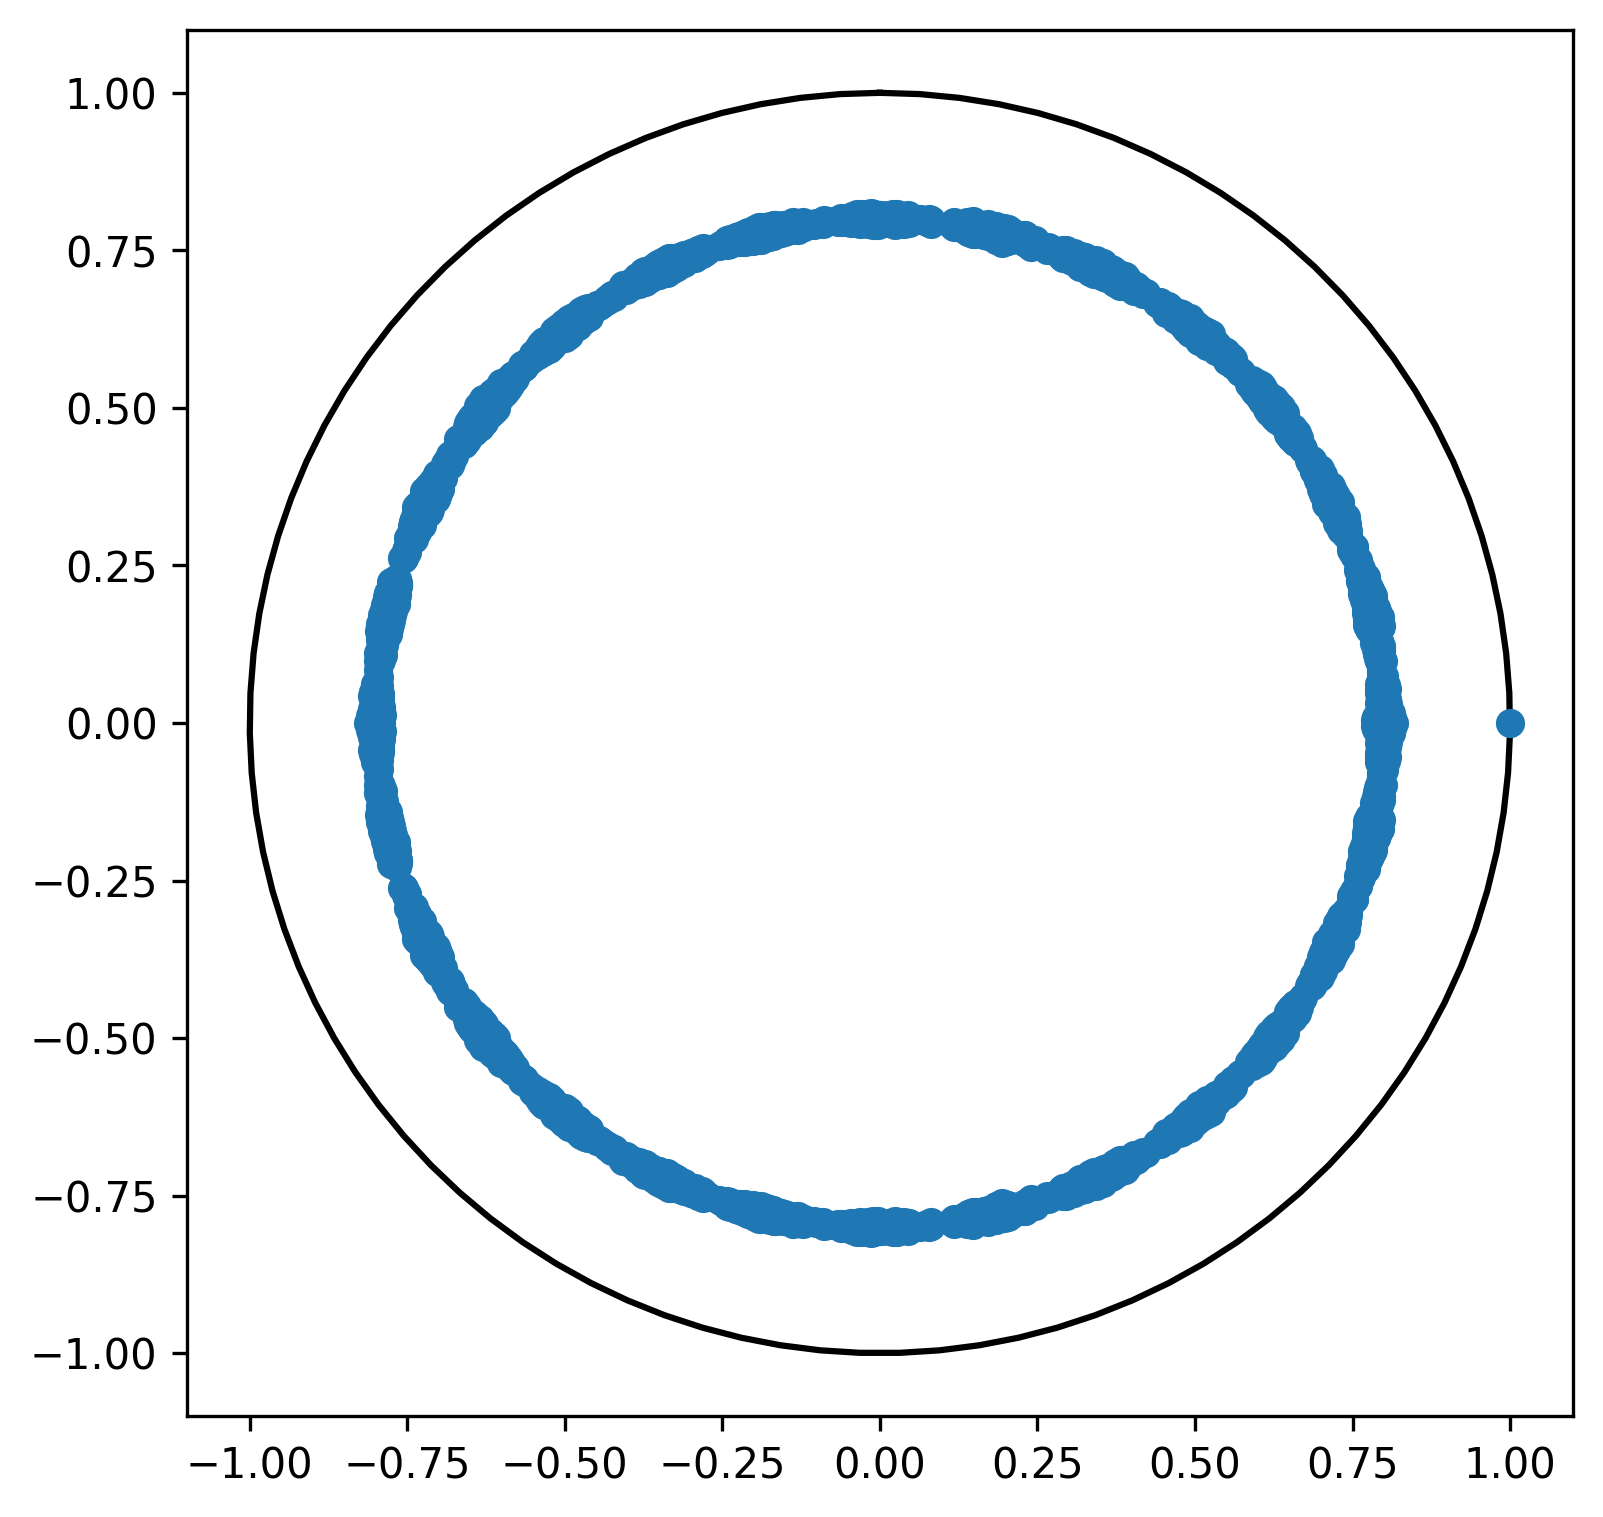

In [32]:
n = 6
d = 2**n

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

U1 = circuit_to_matrix(integrabel_circuit(n, n))

channel_target1 = DilutedKrausMap(U = U1, c=0.8, kraus_part=KrausMap(d, rank=4))
spectrum1 = channel_spectrum(channel_target1, use_coords=False)

t = np.linspace(0, 2*np.pi, 100)
circle = [np.sin(t), np.cos(t)]
fig = plt.figure(figsize=(6,6), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle, "k")

plt.plot(np.real(spectrum1), np.imag(spectrum1), "o")
plt.show()

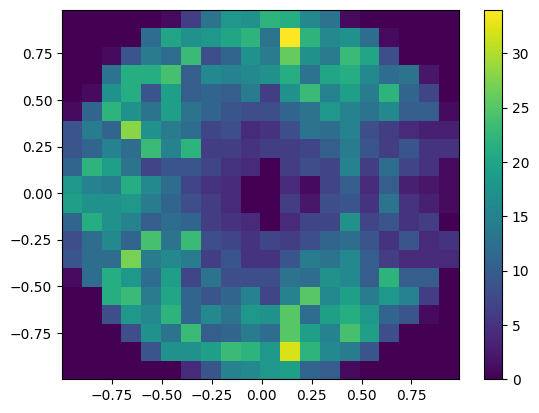

In [38]:
#z_list1 = complex_spacing_ratio(spectrum1)

plt.hist2d(np.real(z_list1), np.imag(z_list1), bins=20)
plt.colorbar()
plt.show()

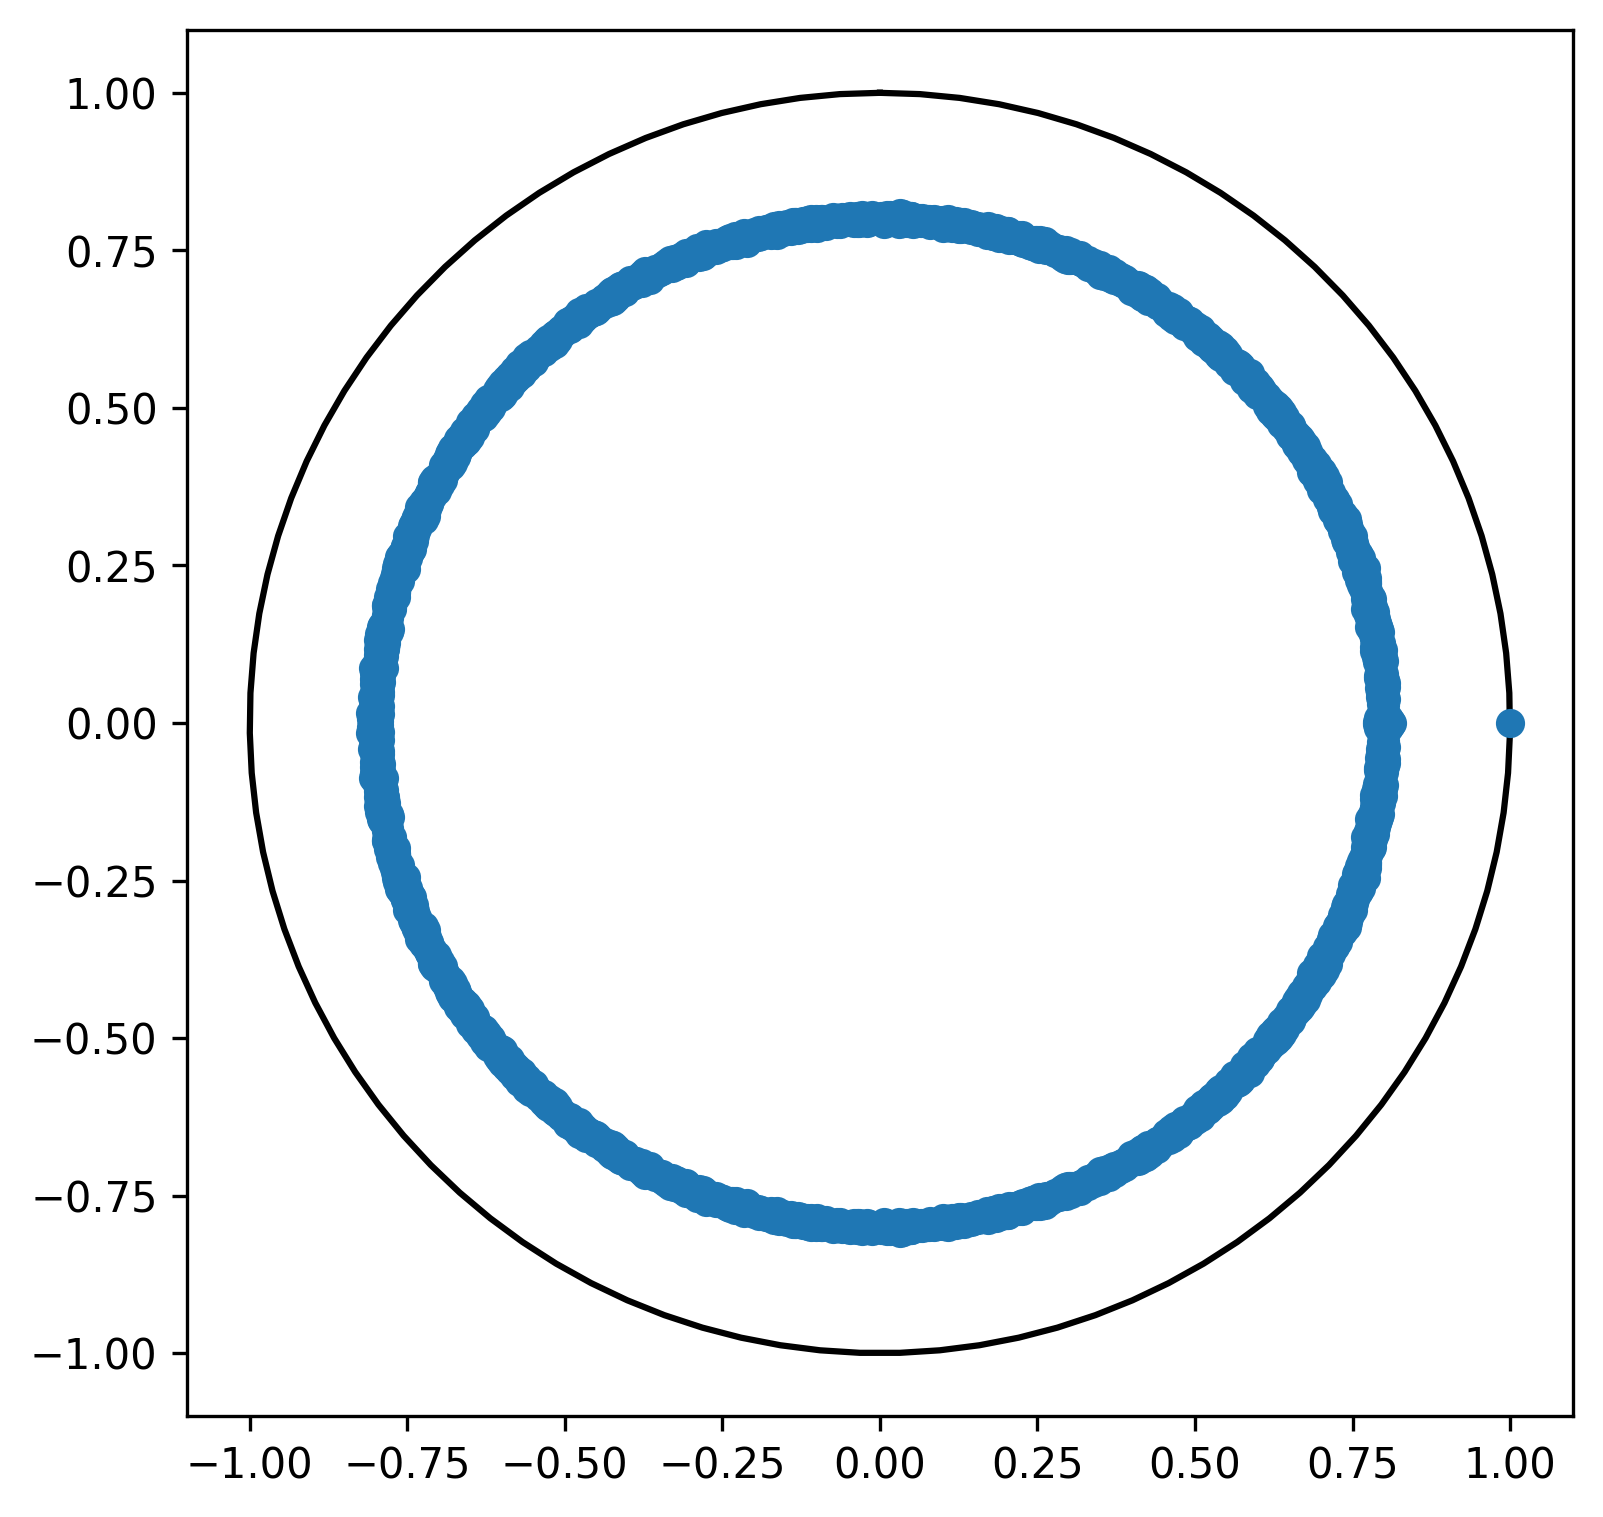

In [34]:
n = 6
d = 2**n

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

U2 = circuit_to_matrix(nonintegrabel_circuit(n, n))

channel_target2 = DilutedKrausMap(U = U2, c=0.8, kraus_part=KrausMap(d, rank=4))
spectrum2 = channel_spectrum(channel_target2, use_coords=False)

t = np.linspace(0, 2*np.pi, 100)
circle = [np.sin(t), np.cos(t)]
fig = plt.figure(figsize=(6,6), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle, "k")

plt.plot(np.real(spectrum2), np.imag(spectrum2), "o")
plt.show()

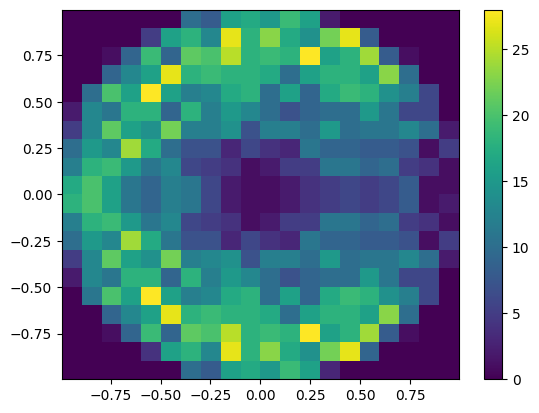

In [39]:
#z_list2 = complex_spacing_ratio(spectrum2)

plt.hist2d(np.real(z_list2), np.imag(z_list2), bins=20)
plt.colorbar()
plt.show()

## Angular Part

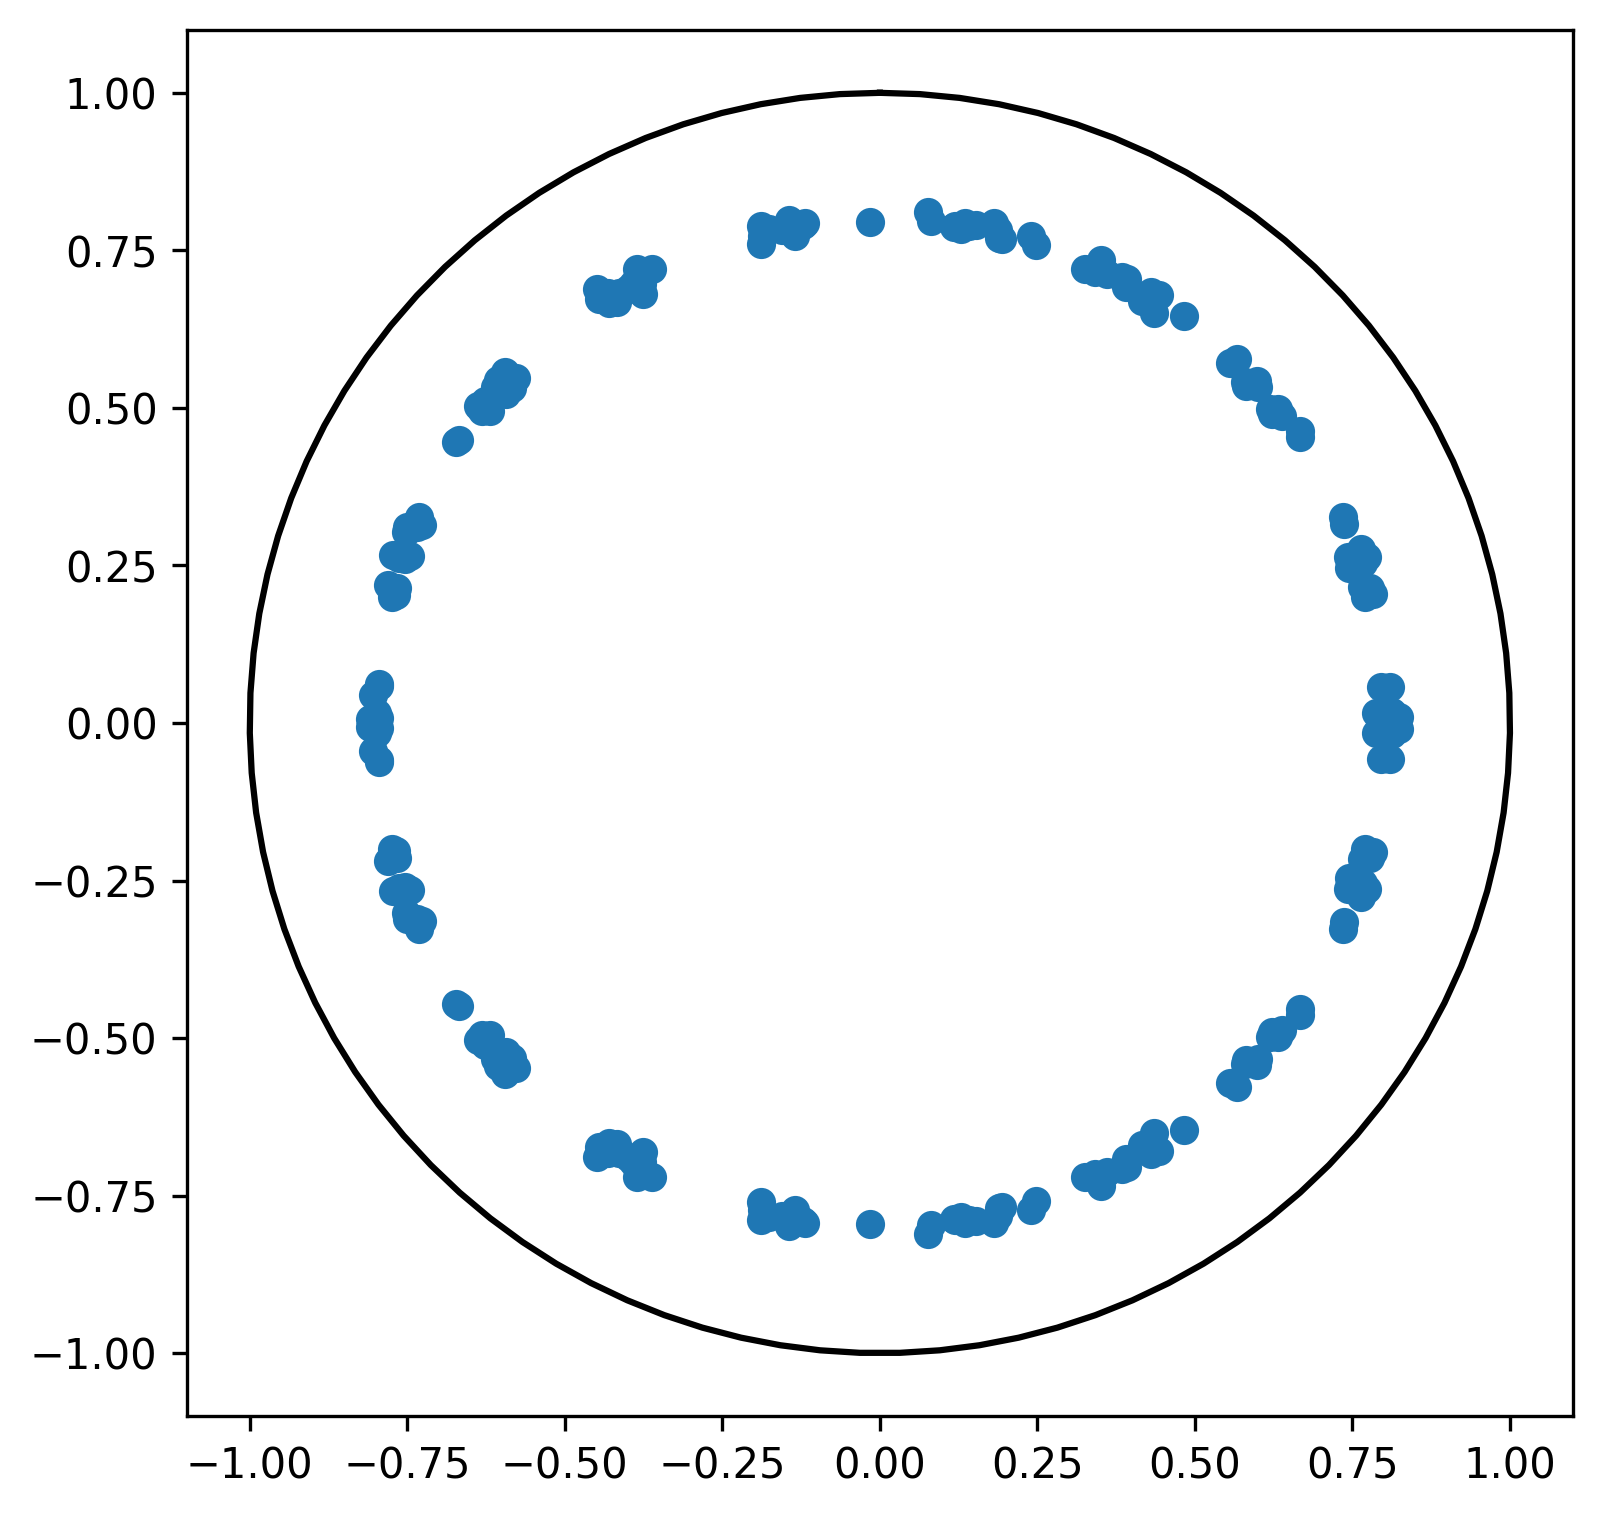

In [50]:
n = 4
d = 2**n

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

U1 = circuit_to_matrix(integrabel_circuit(n, n))

channel_target1 = DilutedKrausMap(U = U1, c=0.8, kraus_part=KrausMap(d, rank=4))
spectrum1 = channel_spectrum(channel_target1, use_coords=False, keep_real=False)

t = np.linspace(0, 2*np.pi, 100)
circle = [np.sin(t), np.cos(t)]
fig = plt.figure(figsize=(6,6), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle, "k")

plt.plot(np.real(spectrum1), np.imag(spectrum1), "o")
plt.show()

  0%|          | 0/248 [00:00<?, ?it/s]

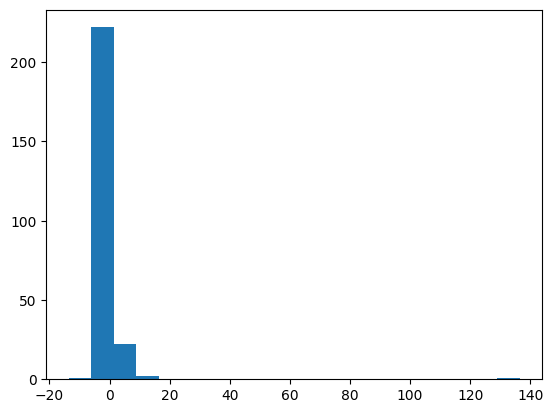

In [51]:
z_list1 = spacing_ratio(spectrum1)

plt.hist(z_list1, bins=20)
plt.show()

In [ ]:
n = 4
d = 2**n

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

U1 = circuit_to_matrix(nonintegrabel_circuit(n, n))

channel_target1 = DilutedKrausMap(U = U1, c=0.8, kraus_part=KrausMap(d, rank=4))
spectrum1 = channel_spectrum(channel_target1, use_coords=False)

t = np.linspace(0, 2*np.pi, 100)
circle = [np.sin(t), np.cos(t)]
fig = plt.figure(figsize=(6,6), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle, "k")

plt.plot(np.real(spectrum1), np.imag(spectrum1), "o")
plt.show()

In [ ]:
z_list1 = spacing_ratio(spectrum1)

plt.hist(z_list1, bins=20)
plt.colorbar()
plt.show()